## 所需的套件

In [1]:
import determined as det
from determined.experimental import client

%config InlineBackend.figure_format = 'retina'

## 下載訓練好的模型

In [2]:
model_entry = client.get_model("MNIST")  # 模型名稱為MNIST，名稱是在MLDE的UI上由使用者自訂的
version = model_entry.get_version(3)  
# 選擇版本號碼V3，版本號碼紀錄在模型頁面最左邊欄位的「V」，

ckpt = version.checkpoint
path = ckpt.download()  # 模型路徑

# Load a PyTorchTrial from a checkpoint:
from determined import pytorch
my_trial = pytorch.load_trial_from_checkpoint_path(path)  # 下載模型

mps


## 模型架構

In [3]:
from torchsummary.torchsummary import summary
import torch

print(summary(my_trial.model, input_data=torch.randn(1, 1, 28, 28)))  # 模型架構

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 23, 26, 26]          230
├─ReLU: 1-2                              [-1, 23, 26, 26]          --
├─Conv2d: 1-3                            [-1, 62, 24, 24]          12,896
├─ReLU: 1-4                              [-1, 62, 24, 24]          --
├─MaxPool2d: 1-5                         [-1, 62, 12, 12]          --
├─Dropout2d: 1-6                         [-1, 62, 12, 12]          --
├─Flatten: 1-7                           [-1, 8928]                --
├─Linear: 1-8                            [-1, 128]                 1,142,912
├─ReLU: 1-9                              [-1, 128]                 --
├─Dropout2d: 1-10                        [-1, 128]                 --
├─Linear: 1-11                           [-1, 10]                  1,290
├─LogSoftmax: 1-12                       [-1, 10]                  --
Total params: 1,157,328
Trainable params: 1,157,328
Non-trainable para

/opt/miniconda3/envs/aif_Torch/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/opt/miniconda3/envs/aif_Torch/lib/python3.9/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


## 以MNIST資料集進行推論

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

val_data =  DataLoader(
    datasets.MNIST(
        root='./',
        download=True,
        train=False,
        transform=transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.1307,), (0.3081,)),
            ]
        ),
    )
)

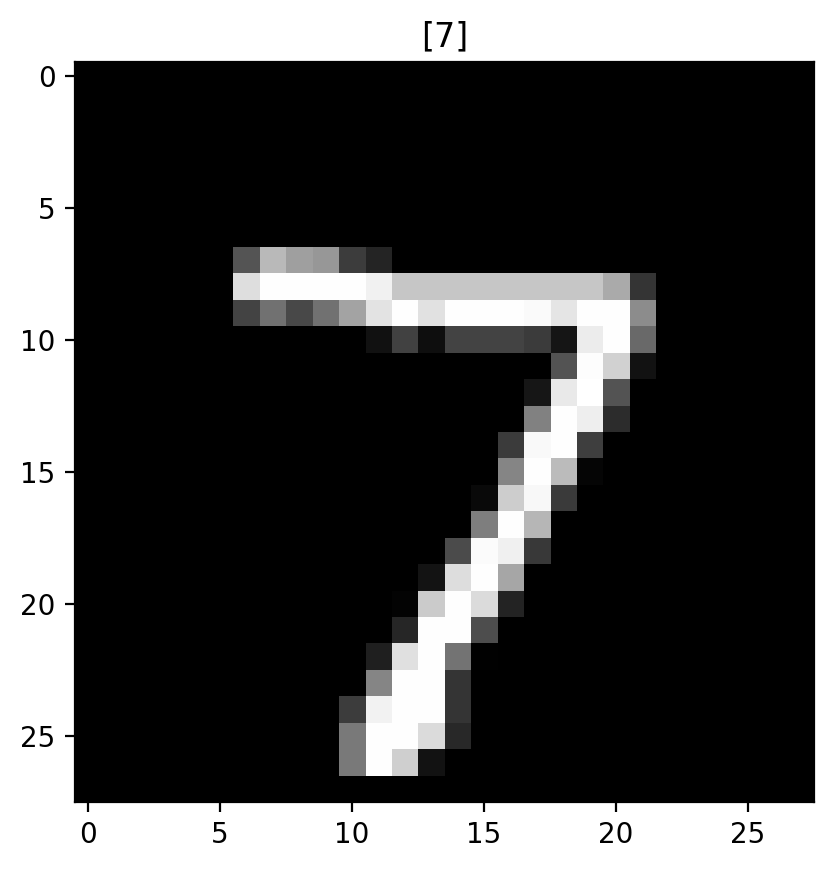

In [5]:
import matplotlib.pyplot as plt

img, label = next(iter(val_data))

plt.imshow(img.numpy().reshape(28, 28), cmap='gray')
plt.title(label.numpy())
plt.show()

## 模型推論結果

In [7]:
print(f'Prediction: {my_trial.model(img).argmax(dim=1, keepdim=True).numpy()}')

Prediction: [[7]]
